In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

# Generate Some Data

# $y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$
# $\varepsilon_t \sim N(0,1)$

In [49]:
errors = np.random.normal(0, 1, 400)
errors

array([ 1.59460178e+00,  1.52322749e+00, -3.92969270e-02, -5.91487128e-01,
        7.40819827e-01, -6.70327707e-01,  7.15871964e-01,  5.98658687e-01,
       -3.84474731e-01,  2.22064516e-01,  4.38256835e-01,  1.23841609e+00,
        1.70695603e+00, -3.15912181e-01,  2.26554706e-01, -2.16853417e+00,
        3.51883612e-01, -7.97108659e-01, -3.66637009e-03,  5.30323670e-01,
       -1.25419763e+00, -9.15961211e-01, -1.36557903e+00,  1.52924977e+00,
        5.59717925e-01, -1.21774027e+00,  1.07408783e-01, -2.11975566e+00,
       -7.54467707e-01,  7.56896813e-01,  5.48390298e-01,  5.47471451e-01,
       -2.50119907e+00,  1.82359687e+00, -5.31132702e-01, -5.58073043e-01,
       -5.19491142e-01, -1.82353731e+00, -4.61830107e-01,  8.02740726e-01,
        1.42287552e+00, -1.21792015e+00,  5.94891599e-01,  5.06586774e-01,
       -2.04985508e+00,  6.96394973e-01,  1.65042976e+00,  3.24521839e-01,
        2.80625611e-01, -2.58251410e+00,  6.33334404e-01, -3.84455614e-02,
       -9.01903203e-01, -

In [50]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [51]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])
series

[52.01667063941888,
 51.04837460560434,
 49.84976234940526,
 50.49243589796019,
 49.44855408546956,
 50.66998682938123,
 50.6839091604891,
 50.06975033283988,
 50.24787222993325,
 50.4117402224116,
 51.48033818246123,
 52.33379951954636,
 50.73839505940446,
 50.612276642557276,
 47.82731406188825,
 49.552436356880435,
 48.693084535732,
 49.78305524974135,
 50.289724524314614,
 48.956831925620286,
 48.7414568376949,
 47.891777197531944,
 50.70822979839911,
 50.7617441256858,
 49.464921828271116,
 49.788228051441585,
 47.55788577172562,
 48.42985266396422,
 49.81918303178538,
 50.62480871075478,
 50.99389661416895,
 47.88230660480436,
 50.98735867483753,
 49.44794632496757,
 49.77655293606241,
 49.09793983052106,
 47.80124432332532,
 48.65290762740425,
 50.07094749147595,
 51.60542277366916,
 49.59205227594551,
 50.53458619404507,
 50.3791673689747,
 48.33124710706195,
 50.028428972017224,
 51.31403122278927,
 51.1936122339388,
 50.90556327400714,
 47.627092691472406,
 49.684516445968484

In [52]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))
series

2019-09-01    52.016671
2019-09-02    51.048375
2019-09-03    49.849762
2019-09-04    50.492436
2019-09-05    49.448554
                ...    
2019-12-28    50.198853
2019-12-29    49.821275
2019-12-30    50.779081
2019-12-31    50.928663
2020-01-01    50.853400
Freq: D, Length: 123, dtype: float64

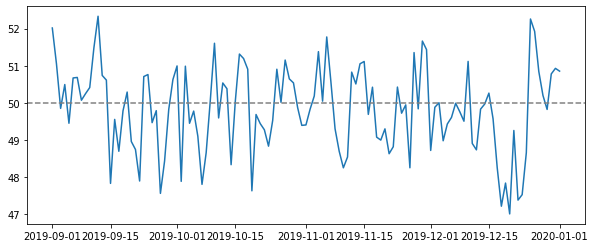

In [53]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [54]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

# ACF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<BarContainer object of 10 artists>

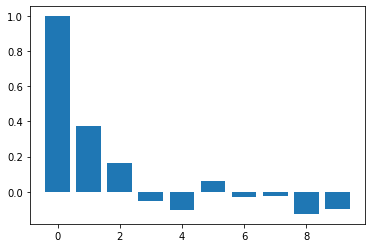

In [55]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

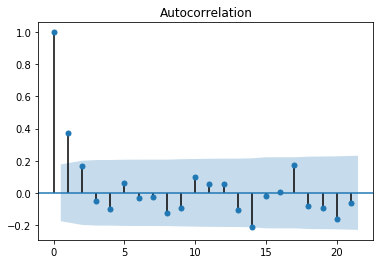

In [56]:
acf_plot = plot_acf(series)

# PACF

<BarContainer object of 25 artists>

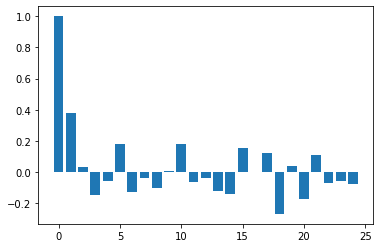

In [57]:
pacf_vals = pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

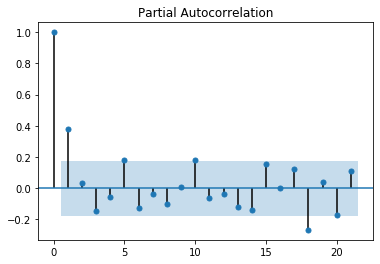

In [58]:
pacf_plot = plot_pacf(series)

* Based on decaying PACF, we are likely dealing with an Moving Average Process
* Based on ACF, we should start with an Moving Average model with lags 1,2

# Get training and testing sets

In [59]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

# Fit MA Model

In [60]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [61]:
#fit the model
model_fit = model.fit()

In [62]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -178.424
Method:                       css-mle   S.D. of innovations              1.056
Date:                Sat, 12 Dec 2020   AIC                            364.847
Time:                        11:15:34   BIC                            376.031
Sample:                    09-01-2019   HQIC                           369.389
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8246      0.158    314.389      0.000      49.514      50.135
ma.L1.y        0.3647      0.085      4.293      0.000       0.198       0.531
ma.L2.y        0.2934      0.099      2.952      0.0

# Predicted Model:
# $\hat{y}_t = 50 + 0.31\varepsilon_{t-1} + 0.25\varepsilon_{t-2}$

In [63]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [64]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
predictions

2019-12-31    50.157415
2020-01-01    49.824606
Freq: D, dtype: float64

In [65]:
residuals = test_data - predictions
residuals

2019-12-31    0.771249
2020-01-01    1.028794
Freq: D, dtype: float64

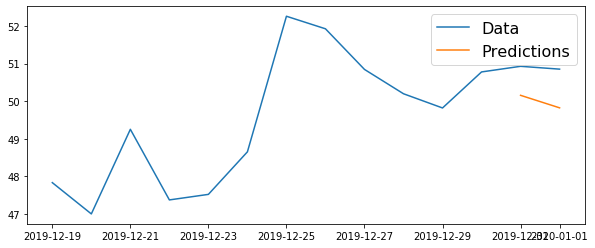

In [66]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [67]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0177


In [68]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.909187049248448
